# Install requirements 

In [ ]:
!git clone --branch word2vec https://github.com/BFF-Pattern/Thai-Artist-Classification-by-Song-Lyrics

Cloning into 'Thai-Artist-Classification-by-Song-Lyrics'...
remote: Enumerating objects: 1020, done.
remote: Counting objects: 100% (306/306), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 1020 (delta 186), reused 277 (delta 160), pack-reused 714
Receiving objects: 100% (1020/1020), 156.98 MiB | 11.04 MiB/s, done.
Resolving deltas: 100% (313/313), done.
Checking out files: 100% (454/454), done.


In [ ]:
!pip install -q transformers
!pip install -q --upgrade torch torchvision
!pip install -q pytorch_transformers
!pip install -q tensorboardX
!pip install -q pyrouge
!pip install pytorch_pretrained_bert
# !pip install -q pyrouge
# !pyrouge_set_rouge_path "/content/ThaiSum/BertSum/ROUGE-1.5.5"
# !apt update
# !apt install -q libxml-parser-perl
# %cd "/content/ThaiSum/BertSum/ROUGE-1.5.5/data"
# !perl WordNet-2.0-Exceptions/buildExeptionDB.pl ./WordNet-2.0-Exceptions ./smart_common_words.txt ./WordNet-2.0.exc.db

     |████████████████████████████████| 4.2 MB 8.4 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 70.1 MB/s 
     |████████████████████████████████| 6.6 MB 56.5 MB/s 
     |████████████████████████████████| 176 kB 7.0 MB/s 
     |████████████████████████████████| 1.2 MB 88.8 MB/s 
     |████████████████████████████████| 880 kB 62.7 MB/s 
     |████████████████████████████████| 132 kB 87.2 MB/s 
     |████████████████████████████████| 8.8 MB 59.9 MB/s 
     |████████████████████████████████| 79 kB 9.7 MB/s 
     |████████████████████████████████| 138 kB 94.7 MB/s 
     |████████████████████████████████| 127 kB 75.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 125

In [ ]:
!gdown 1J2XVx41wDvlcCeXHqmsSp1lSvwXtiy5i
# !gdown 1-2-XV-x35DbDL4i5seXPk93aWtnDEg3q
# !gdown 1v76sCx40VxufLl_RljFAlZVwoXDcd3T_
!gdown 1vXgkV6_6hZyVzoKdTdtzkaLjv4BYQxz1
# !gdown 1_QtoLQk0HpgxXdDsMCTmwVyXcEgHPW2c

Downloading...
From: https://drive.google.com/uc?id=1J2XVx41wDvlcCeXHqmsSp1lSvwXtiy5i
To: /content/bert_only_weight.pt
100% 711M/711M [00:04<00:00, 172MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vXgkV6_6hZyVzoKdTdtzkaLjv4BYQxz1
To: /content/saved_weights.pt
100% 713M/713M [00:03<00:00, 207MB/s]


In [ ]:
!mv /content/bert_only_weight.pt /content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/src
!mv /content/saved_weights.pt /content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/src

# Pre-processing

In [ ]:
%cd '/content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/src' 
!python preprocess.py -mode format_to_bert -raw_path "/content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/js_data" -save_path "/content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/bert_data" -oracle_mode greedy -n_cpus 1 -log_file ../logs/preprocess.log

/content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/src
song.train.6.json
[2022-05-26 17:18:49,670 INFO] https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-multilingual-cased-vocab.txt not found in cache, downloading to /tmp/tmpx396sr7e
100% 995526/995526 [00:00<00:00, 3123789.87B/s]
[2022-05-26 17:18:50,275 INFO] copying /tmp/tmpx396sr7e to cache at /root/.pytorch_pretrained_bert/96435fa287fbf7e469185f1062386e05a075cadbf6838b74da22bf64b080bc32.99bcd55fc66f4f3360bc49ba472b940b8dcf223ea6a345deb969d607ca900729
[2022-05-26 17:18:50,277 INFO] creating metadata file for /root/.pytorch_pretrained_bert/96435fa287fbf7e469185f1062386e05a075cadbf6838b74da22bf64b080bc32.99bcd55fc66f4f3360bc49ba472b940b8dcf223ea6a345deb969d607ca900729
[2022-05-26 17:18:50,277 INFO] removing temp file /tmp/tmpx396sr7e
[2022-05-26 17:18:50,277 INFO] loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-multilingual-cased-vocab.txt from cache at /root/.pytorch

## View bert_data .pt file

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, TensorDataset, DataLoader, RandomSampler, SequentialSampler

pt_train = torch.load('/content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/bert_data/song.train.6.bert.pt')
df_train = pd.DataFrame(pt_train)
# df_train

pt_test = torch.load('/content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/bert_data/song.test.6.bert.pt')
df_test = pd.DataFrame(pt_test)
# df_test

In [ ]:
df_train.columns

Index(['song_id', 'src', 'labels', 'segs', 'clss', 'src_txt'], dtype='object')

In [ ]:
n_cls = 32

In [ ]:
df_train = df_train[df_train['labels']<n_cls].reset_index()[df_train.columns]
df_test = df_test[df_test['labels']<n_cls].reset_index()[df_test.columns]

In [ ]:
df_train.head()

,song_id,src,labels,segs,clss,src_txt
0,4,"[101, 1433, 53936, 22123, 37022, 43102, 20503,...",28,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[0],"[สุดท้าย ก็ เลิกกัน และ ฉัน ไม่ เหลือ ใคร, ครึ..."
1,5,"[101, 1436, 54633, 18427, 1400, 22598, 1426, 2...",29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[0],[อยาก จะ ยิ้ม ให้ เธอ ทุกที ที่ เจอกัน อยาก จะ...
2,10,"[101, 46301, 1397, 111429, 16000, 80420, 1425,...",26,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[0],[ใน คืนนี้ มี ดาว เป็น ล้าน ดวง แต่ ใจ ฉัน มี ...
3,11,"[101, 1454, 17405, 31904, 1450, 18427, 44334, ...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[0],"[ไม่ เก่ง ไม่ กล้า พูด ความในใจ, ไม่ รู้ ว่า ม..."
4,15,"[101, 1451, 30011, 31904, 25915, 25915, 1417, ...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[0],"[แต่ คน คน นี้ ก็ ยัง รัก เธอ, ไม่ มี ผู้ใด เป..."


In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df_train, df_train['labels'], 
#                                                         random_state=2022, 
#                                                         test_size=0.3, 
#                                                         stratify=df_train['labels'])

In [ ]:
class DatasetFF(Dataset):
    def __init__(self, pt_df):
      self.src = torch.tensor(pt_df['src'])
      self.seg = torch.tensor(pt_df['segs'])
      self.clss = torch.tensor(pt_df['clss'])
      # self.mask = torch.tensor(pt_df['mask'])
      self.y = torch.tensor(pt_df['labels'].tolist())
 
    def __getitem__(self, index):
        src = self.src[index]
        seg = self.seg[index]
        clss = self.clss[index]
        # mask = self.mask[index]
        y = self.y[index]

        return src, seg, clss, y

    def __len__(self):
        return self.src.shape[0]

In [ ]:
batch_size = 4

train_data = DatasetFF(df_train)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)


# # wrap tensors
# val_data = DatasetFF(df)

# # sampler for sampling the data during training
# val_sampler = SequentialSampler(val_data)

# # dataLoader for train set
# valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=batch_size)

# wrap tensors
test_data = DatasetFF(df_test)

# sampler for sampling the data during training
test_sampler = SequentialSampler(test_data)

# dataLoader for train set
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

## Fine-Tuning BERT

In [ ]:
import torch
import torch.nn as nn
from pytorch_pretrained_bert import BertModel, BertConfig

class Bert(nn.Module):
    def __init__(self, temp_dir='temp', finetune=True):
        super(Bert, self).__init__()
        self.model = BertModel.from_pretrained('bert-base-multilingual-cased', cache_dir=temp_dir)

        self.finetune = finetune

    def forward(self, x, segs):
        if(self.finetune):
            top_vec, _ = self.model(x, segs, attention_mask=None)
        else:
            self.eval()
            with torch.no_grad():
                top_vec, _ = self.model(x, segs, attention_mask=None)
        return top_vec[-1]

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert, n_class=64):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.3)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768, 512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512, n_class)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, src, seg, clss):

      #pass the inputs to the model  
      _, cls_hs = self.bert(src, seg, attention_mask=None)

      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [ ]:
!gdown 1oaR3xgwKa-0D_ZGlIKhctdiVsUSMsi61
!gdown 1TAlkMJIodCdBVCV6TH4ej23O8r465dF3
!gdown 17_DtJNqJgoQJjPh2WxeOcWt3xEkcUGpG
!gdown 1YAJv-ATlE2xt8PmBw7ZzCv_CjSxaC5iP
!gdown 19bHRRCYGmWmMk-uIRTE9abDUIeZRehuO

Downloading...
From: https://drive.google.com/uc?id=1oaR3xgwKa-0D_ZGlIKhctdiVsUSMsi61
To: /content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/src/saved_weights_4.pt
100% 713M/713M [00:06<00:00, 114MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TAlkMJIodCdBVCV6TH4ej23O8r465dF3
To: /content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/src/saved_weights_8.pt
100% 713M/713M [00:04<00:00, 151MB/s]
Downloading...
From: https://drive.google.com/uc?id=17_DtJNqJgoQJjPh2WxeOcWt3xEkcUGpG
To: /content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/src/saved_weights_16.pt
100% 713M/713M [00:06<00:00, 115MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YAJv-ATlE2xt8PmBw7ZzCv_CjSxaC5iP
To: /content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/src/saved_weights_32.pt
100% 713M/713M [00:07<00:00, 99.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=19bHRRCYGmWmMk-uIRTE9abDUIeZRehuO
To: /content/Thai-Artist-Classification

In [ ]:
# # specify GPU
device = torch.device("cuda")

bert = Bert()
bert.load_state_dict(torch.load('/content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/src/bert_only_weight.pt', map_location=lambda storage, loc: storage))


100%|██████████| 662804195/662804195 [00:29<00:00, 22849637.29B/s]


<All keys matched successfully>

In [ ]:
torch.cuda.empty_cache()

In [ ]:
from transformers import AdamW

# pass the pre-trained BERT to our define architecture, push the model to GPU
model = BERT_Arch(bert.model, n_class=n_cls).to(device)
model.load_state_dict(torch.load(f'/content/Thai-Artist-Classification-by-Song-Lyrics/models/newmodel/src/saved_weights_{n_cls}.pt', map_location=lambda storage, loc: storage))

optimizer = AdamW(model.parameters(), lr = 1e-3)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight(class_weight ='balanced', classes= df_train['labels'].unique(), y = df_train['labels'].tolist())

print(class_wts)

[0.99888393 0.99888393 0.99888393 0.99888393 0.99888393 0.99888393
 0.99888393 0.99888393 1.03587963 0.99888393 0.99888393 0.99888393
 0.99888393 0.99888393 0.99888393 0.99888393 0.99888393 0.99888393
 0.99888393 0.99888393 0.99888393 0.99888393 0.99888393 0.99888393
 0.99888393 0.99888393 0.99888393 0.99888393 0.99888393 0.99888393
 0.99888393 0.99888393]


In [ ]:
# convert class weights to tensor
weights= torch.tensor(class_wts, dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 5

In [ ]:
import sys, os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

## Declare Train & Evaluation function

In [ ]:
# function to train the model
def train():

  model.train()

  total_loss, total_accuracy = 0, 0

  # empty list to save model predictions
  total_preds=[]

  # iterate over batches
  for step, batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # print(f"batch: {batch}")

    # push the batch to gpu
    batch = [r.to(device) for r in batch]

    src, seg, clss, labels = batch

    # print(src)

    # src = src.to(device)
    # seg = seg.to(device)
    # clss = clss.to(device)
    # labels = labels.to(device)

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(src, seg, clss)

    # print(preds.shape)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds = preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)

  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
# # function for evaluating the model
# def evaluate():
  
#   print("\nEvaluating...")
  
#   # deactivate dropout layers
#   model.eval()

#   total_loss, total_accuracy = 0, 0
  
#   # empty list to save the model predictions
#   total_preds = []

#   # iterate over batches
#   for step,batch in enumerate(val_dataloader):
    
#     # Progress update every 50 batches.
#     if step % 50 == 0 and not step == 0:
      
#       # Calculate elapsed time in minutes.
#       elapsed = format_time(time.time() - t0)
            
#       # Report progress.
#       print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

#     # push the batch to gpu
#     batch = [t.to(device) for t in batch]

#     sent_id, mask, labels = batch

#     # deactivate autograd
#     with torch.no_grad():
      
#       # model predictions
#       preds = model(sent_id, mask)

#       # compute the validation loss between actual and predicted values
#       loss = cross_entropy(preds,labels)

#       total_loss = total_loss + loss.item()

#       preds = preds.detach().cpu().numpy()

#       total_preds.append(preds)

#   # compute the validation loss of the epoch
#   avg_loss = total_loss / len(val_dataloader) 

#   # reshape the predictions in form of (number of samples, no. of classes)
#   total_preds  = np.concatenate(total_preds, axis=0)

#   return avg_loss, total_preds

### Start Model Train

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    # valid_loss, _ = evaluate()
    
    #save the best model
    # if valid_loss < best_valid_loss:
    #     best_valid_loss = valid_loss
    #     torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    # valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    # print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 5
  Batch    50  of    224.
  Batch   100  of    224.
  Batch   150  of    224.
  Batch   200  of    224.

Training Loss: 3.467

 Epoch 2 / 5
  Batch    50  of    224.
  Batch   100  of    224.
  Batch   150  of    224.
  Batch   200  of    224.

Training Loss: 3.467

 Epoch 3 / 5
  Batch    50  of    224.
  Batch   100  of    224.
  Batch   150  of    224.
  Batch   200  of    224.

Training Loss: 3.467

 Epoch 4 / 5
  Batch    50  of    224.
  Batch   100  of    224.
  Batch   150  of    224.
  Batch   200  of    224.

Training Loss: 3.467

 Epoch 5 / 5
  Batch    50  of    224.
  Batch   100  of    224.
  Batch   150  of    224.
  Batch   200  of    224.

Training Loss: 3.467


In [ ]:
torch.save(model.state_dict(), f'/content/saved_weights_{n_cls}.pt')

In [ ]:
# def calc_accuracy(top_n=[1,2,4,8,16,32,64]):
top_n = [1,2,4,8,16,32]
model.eval()

total_accuracy1, total_accuracy2, total_accuracy4, total_accuracy8, total_accuracy16, total_accuracy32 = (0,0,0,0,0,0)

for step, batch in enumerate(test_dataloader):
  # Progress update every 50 batches.
  if step % 50 == 0 and not step == 0:
    # Report progress.
    print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(test_dataloader)))
  
  batch = [t.to(device) for t in batch]

  src, seg, clss, labels = batch

  with torch.no_grad():

    # model predictions
    preds = model(src, seg, clss)

    # sort topk
    sorted_preds = torch.argsort(preds, dim=1)
    ranked_preds = sorted_preds[torch.arange(sorted_preds.size(0)), labels]

    total_accuracy1 += (ranked_preds < top_n[0]).sum()
    total_accuracy2 += (ranked_preds < top_n[1]).sum()
    total_accuracy4 += (ranked_preds < top_n[2]).sum()
    total_accuracy8 += (ranked_preds < top_n[3]).sum()
    total_accuracy16 += (ranked_preds < top_n[4]).sum()
    total_accuracy32 += (ranked_preds < top_n[5]).sum()

avg_accuracy1 = total_accuracy1 / len(test_data)
avg_accuracy2 = total_accuracy2 / len(test_data)
avg_accuracy4 = total_accuracy4 / len(test_data)
avg_accuracy8 = total_accuracy8 / len(test_data)
avg_accuracy16 = total_accuracy16 / len(test_data)
avg_accuracy32 = total_accuracy32 / len(test_data)

  Batch    50  of     56.


In [ ]:
avg_accuracy1, avg_accuracy2, avg_accuracy4, avg_accuracy8, avg_accuracy16, avg_accuracy32

(tensor(0.0314, device='cuda:0'),
 tensor(0.0628, device='cuda:0'),
 tensor(0.1256, device='cuda:0'),
 tensor(0.2511, device='cuda:0'),
 tensor(0.5022, device='cuda:0'),
 tensor(1., device='cuda:0'))

# Training the model

In [ ]:
# # Train (ARedSum-Base) Train a Salience Ranker
# !python train.py -bert_data_path "/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/bert_data/thaisum" -visible_gpus 0 -gpu_ranks 0 -accum_count 2 -report_every 50 -save_checkpoint_steps 2000 -decay_method noam -mode train -model_name base -label_format soft -result_path "/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/results/newmodel_base" -model_path "/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/model_checkpoint/newmodel_base"

In [ ]:
# # Train (ARedSum-CTX) Train a Ranker for Selection
# !python train.py -fix_scorer -train_from /path/to/the/best/salience/ranker.pt -bert_data_path /path/to/cnndm_or_nyt50/bert_data/ -visible_gpus 2 -gpu_ranks 0 -accum_count 2 -report_every 50 -save_checkpoint_steps 2000 -decay_method noam -model_name ctx -max_epoch 2 -train_steps 50000 -label_format soft -use_rouge_label t -valid_by_rouge t -rand_input_thre 1.0 -temperature 20 -seg_count 30 -ngram_seg_count 20,20,20 -bilinear_out 20 -result_path /path/to/where/you/want/to/save/the/preidicted/summaries -model_path /path/to/where/you/want/to/save/the/models

In [ ]:
# # Train (ARedSum-SEQ) Train a Sequence Generation Model
# !python train.py -bert_data_path /path/to/cnndm_or_nyt50/bert_data/ -visible_gpus 2 -gpu_ranks 0 -accum_count 2 -report_every 50 -save_checkpoint_steps 2000 -decay_method noam -model_name seq -max_epoch 2 -train_steps 50000 -label_format soft -use_rouge_label t -valid_by_rouge t -rand_input_thre 0.8 -temperature 20 -result_path /path/to/where/you/want/to/save/the/preidicted/summaries -model_path /path/to/where/you/want/to/save/the/models

# Evaluation

## Evaluate by ROUGE Score 

In [ ]:
# Evaluate ARedSum-Base 
!python train.py -bert_data_path "/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/bert_data/thaisum" -accum_count 2 -report_every 50 -save_checkpoint_steps 2000 -decay_method noam -mode train -model_name base -label_format soft -result_path "/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/bert_data/thaisum" -visible_gpus 0 -gpu_ranks 0 -accum_count 2 -report_every 50 -save_checkpoint_steps 2000 -decay_method noam -mode test -model_name base -label_format soft -result_path "/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/bert_data/thaisum" -accum_count 2 -report_every 50 -save_checkpoint_steps 2000 -decay_method noam -mode train -model_name base -label_format soft -result_path "/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/results/aredsum_base" -test_from "/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/bert_data/thaisum" -accum_count 2 -report_every 50 -save_checkpoint_steps 2000 -decay_method noam -mode train -model_name base -label_format soft -result_path "/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/model_checkpoint/ARedSum_base.pt"

[2020-11-14 08:30:40,819 INFO] Loading checkpoint from /content/ThaiSum/ARedSum/model_checkpoint/ARedSum_base.pt
Namespace(accum_count=2, aggr='last', batch_size=3000, bert_config_path='config/bert_config_uncased_base.json', bert_data_path='/content/ThaiSum/ARedSum/bert_data/thaisum', beta1=0.9, beta2=0.999, bilinear_out=10, block_trigram=True, dataset='', decay_method='noam', dropout=0.1, ff_size=2048, fix_scorer=False, gpu_ranks=[0], heads=8, hidden_size=128, inter_layers=2, label_format='soft', log_file='../logs/cnndm.log', loss='wsoftmax', lr=0.002, max_epoch=2, max_grad_norm=0, max_label_sent_count=3, mode='test', model_name='base', model_path='../models/', ngram_seg_count='20,20,20', optim='adam', param_init=0, param_init_glorot=True, rand_input_thre=1.0, recall_eval=False, report_every=50, report_precision=True, report_rouge=True, result_path='/content/ThaiSum/ARedSum/results/aredsum_base', rnn_size=512, salience_softmax=False, save_checkpoint_steps=2000, save_model_count=3, see


ROUGE Scores are shown here
```
[2020-11-14 08:31:40,328 INFO] [PERF]Rouges at step 0: RG1-P:42.77	RG1-R:56.72	RG1-F:45.16	RG2-P:20.05	RG2-R:29.11	RG2-F:21.83	RGL-P:42.71	RGL-R:56.59	RGL-F:45.08 
```
Therefore ROUGE-F1 results are:  R1=45.16, R2=21.83, RL=45.08.



## Evaluate by BertScore

In [ ]:
!pip install -q bert_score
import bert_score
from bert_score import score
import logging
import transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

In [ ]:
with open("/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/bert_data/thaisum" -accum_count 2 -report_every 50 -save_checkpoint_steps 2000 -decay_method noam -mode train -model_name base -label_format soft -result_path "/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/results/aredsum_base_step0_initial.candidate") as f: # Output Summary 
    cands = [line.strip() for line in f]

with open("/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/bert_data/thaisum" -accum_count 2 -report_every 50 -save_checkpoint_steps 2000 -decay_method noam -mode train -model_name base -label_format soft -result_path "/content/Thai-Artist-Classification-by-Song-Lyrics/newmodel/results/aredsum_base_step0_initial.gold") as f:  # Reference Summary
    refs = [line.strip() for line in f]

In [ ]:
P, R, F1 = score(cands, refs, lang='th', verbose=False)

print(f"System level F1 score: {F1.mean()*100:.3f}") ##  *100 to make it simplier to read similar to ROUGE.
print(f"System level P score: {P.mean()*100:.3f}")
print(f"System level R score: {R.mean()*100:.3f}")

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1423: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


System level F1 score: 81.076
System level P score: 79.806
System level R score: 82.700


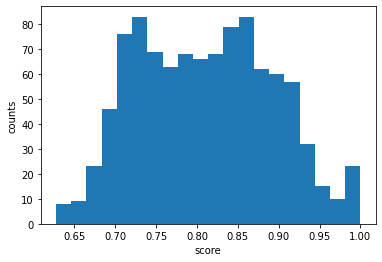

In [ ]:
import matplotlib.pyplot as plt
plt.hist(F1, bins=20)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()